In [1]:
import numpy as np
import pandas as pd

# traindataset 

# 1. Classification Tasks

In [3]:
train_data = pd.read_csv('merged_cleaned_train_flight_weather_data.csv')  # Replace with your actual path|

# Prepare the Target Variable:




In [5]:
# Create binary target variable
train_data['delay_binary'] = np.where(train_data['departure.delay_minutes'] > 0, 'delayed', 'on-time')

# Verify the distribution
print(train_data['delay_binary'].value_counts())

delay_binary
delayed    33417
on-time    18454
Name: count, dtype: int64


# Feature Selection:



In [7]:
# Define feature columns based on EDA
feature_cols = ['Departure_Hour', 'Temperature (°F) Avg', 'Wind Speed (mph) Avg', 
               'Precipitation (in) Total', 'Humidity (%) Avg', 'Pressure (in) Avg']

# Include encoded categorical features
day_of_week_cols = [col for col in train_data.columns if 'Departure_DayOfWeek_' in col]
feature_cols += day_of_week_cols

# Example: Include 'airline.name_' encoded features if applicable
airline_encoded_cols = [col for col in train_data.columns if 'airline.name_' in col]
feature_cols += airline_encoded_cols

# Define X and y
X = train_data[feature_cols]
y = train_data['delay_binary']


# Train-Test Split:



In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Model training

# randomforestclassifer

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

# Model Evaluation:



Random Forest Classifier Performance:
Accuracy: 0.68
Precision: 0.73
Recall: 0.81
F1-Score: 0.77

Classification Report:
              precision    recall  f1-score   support

     delayed       0.73      0.81      0.77      6684
     on-time       0.57      0.46      0.51      3691

    accuracy                           0.68     10375
   macro avg       0.65      0.63      0.64     10375
weighted avg       0.67      0.68      0.68     10375



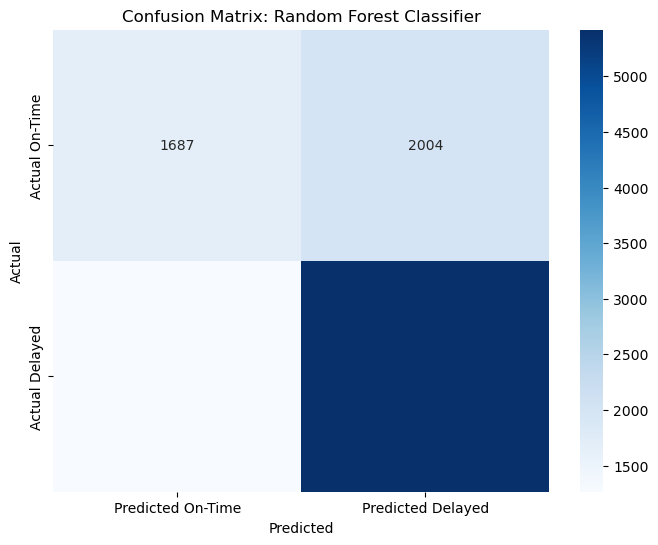

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = rf_classifier.predict(X_val)

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, pos_label='delayed')
recall = recall_score(y_val, y_pred, pos_label='delayed')
f1 = f1_score(y_val, y_pred, pos_label='delayed')

print(f"Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}\n")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred, labels=['on-time', 'delayed'])
cm_df = pd.DataFrame(cm, index=['Actual On-Time', 'Actual Delayed'], columns=['Predicted On-Time', 'Predicted Delayed'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Random Forest Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Class-wise Precision-Recall:



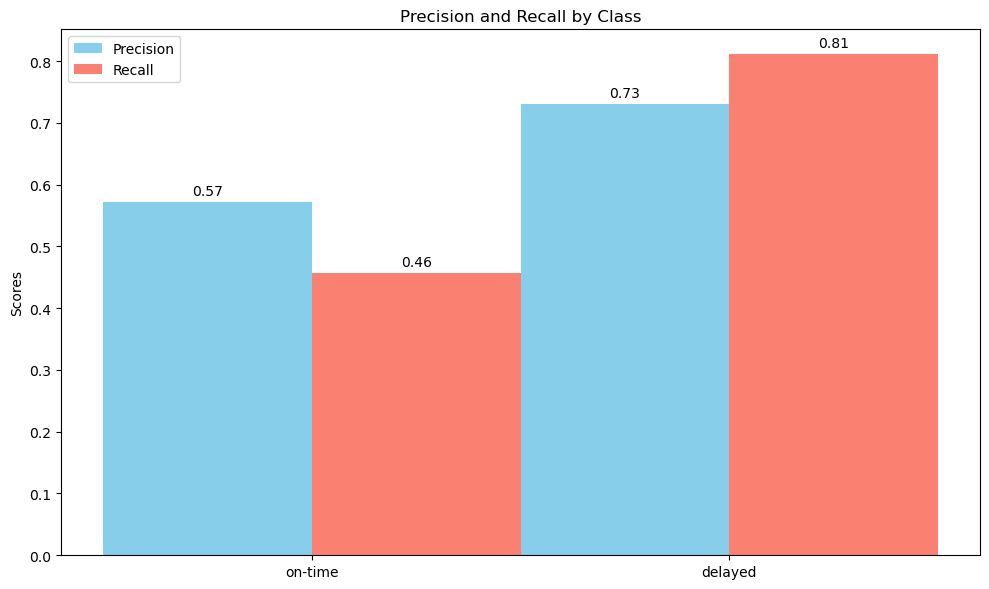

In [15]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall = precision_recall_fscore_support(y_val, y_pred, labels=['on-time', 'delayed'])

labels = ['on-time', 'delayed']
precision_vals = precision_recall[0]
recall_vals = precision_recall[1]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, precision_vals, width, label='Precision', color='skyblue')
rects2 = ax.bar(x + width/2, recall_vals, width, label='Recall', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


# 1.2. Multi-Class Classification


In [17]:
# Create multi-class target variable
def categorize_delay(minutes):
    if minutes == 0:
        return 'No Delay'
    elif 0 < minutes < 45:
        return 'Short Delay'
    elif 45 <= minutes <= 175:
        return 'Moderate Delay'
    else:
        return 'Long Delay'

train_data['delay_category'] = train_data['departure.delay_minutes'].apply(categorize_delay)

# Verify the distribution
print(train_data['delay_category'].value_counts())


delay_category
Short Delay       29151
No Delay          13966
Long Delay         5631
Moderate Delay     3123
Name: count, dtype: int64


In [19]:
train_data['delay_category'].unique()

array(['Long Delay', 'No Delay', 'Short Delay', 'Moderate Delay'],
      dtype=object)

# Feature Selection:



In [21]:
# Define feature columns
feature_cols = ['Departure_Hour', 'Temperature (°F) Avg', 'Wind Speed (mph) Avg', 
               'Precipitation (in) Total', 'Humidity (%) Avg', 'Pressure (in) Avg']

# Include encoded categorical features
day_of_week_cols = [col for col in train_data.columns if 'Departure_DayOfWeek_' in col]
feature_cols += day_of_week_cols

# Include airline encoded features if applicable
airline_encoded_cols = [col for col in train_data.columns if 'airline.name_' in col]
feature_cols += airline_encoded_cols

# Define X and y
X = train_data[feature_cols]
y = train_data['delay_category']


# train test spliting

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# model training

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_multiclass = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_multiclass.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Model Evaluation:



Random Forest Classifier Performance:
Accuracy: 0.58
Precision (Weighted): 0.55
Recall (Weighted): 0.58
F1-Score (Weighted): 0.56

Classification Report:
                precision    recall  f1-score   support

    Long Delay       0.31      0.18      0.23      1126
Moderate Delay       0.18      0.11      0.13       625
      No Delay       0.50      0.42      0.46      2793
   Short Delay       0.66      0.79      0.72      5831

      accuracy                           0.58     10375
     macro avg       0.41      0.38      0.39     10375
  weighted avg       0.55      0.58      0.56     10375



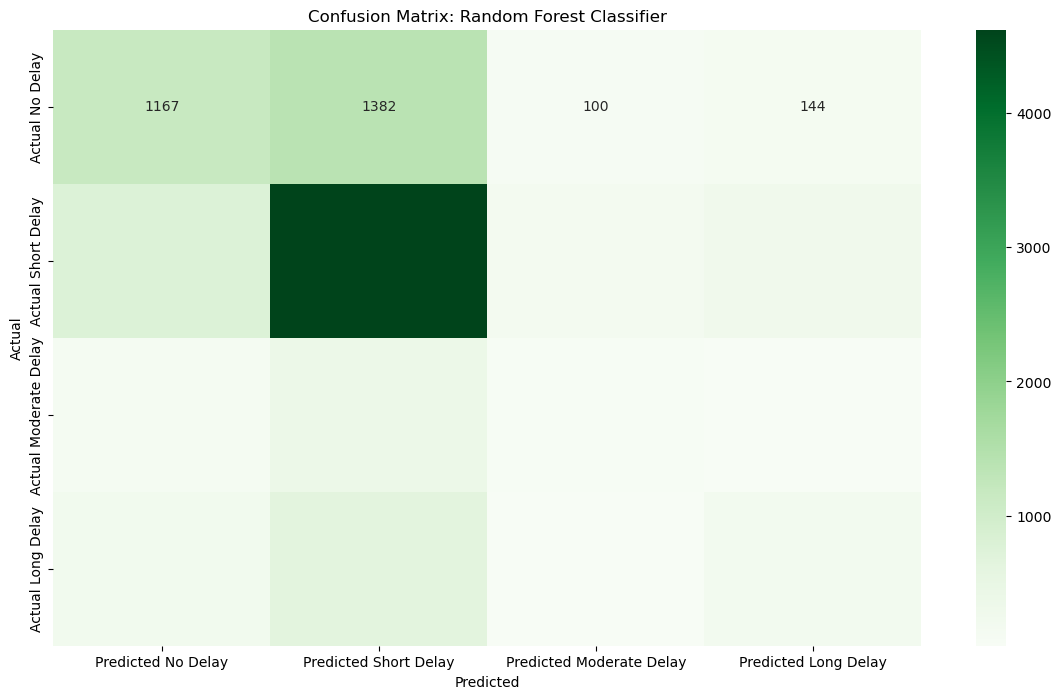

In [27]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = rf_multiclass.predict(X_val)

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='weighted')

print(f"Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1-Score (Weighted): {f1:.2f}\n")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred, labels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])
cm_df = pd.DataFrame(cm, index=['Actual No Delay', 'Actual Short Delay', 'Actual Moderate Delay', 'Actual Long Delay'],
                     columns=['Predicted No Delay', 'Predicted Short Delay', 'Predicted Moderate Delay', 'Predicted Long Delay'])

plt.figure(figsize=(14,8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: Random Forest Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


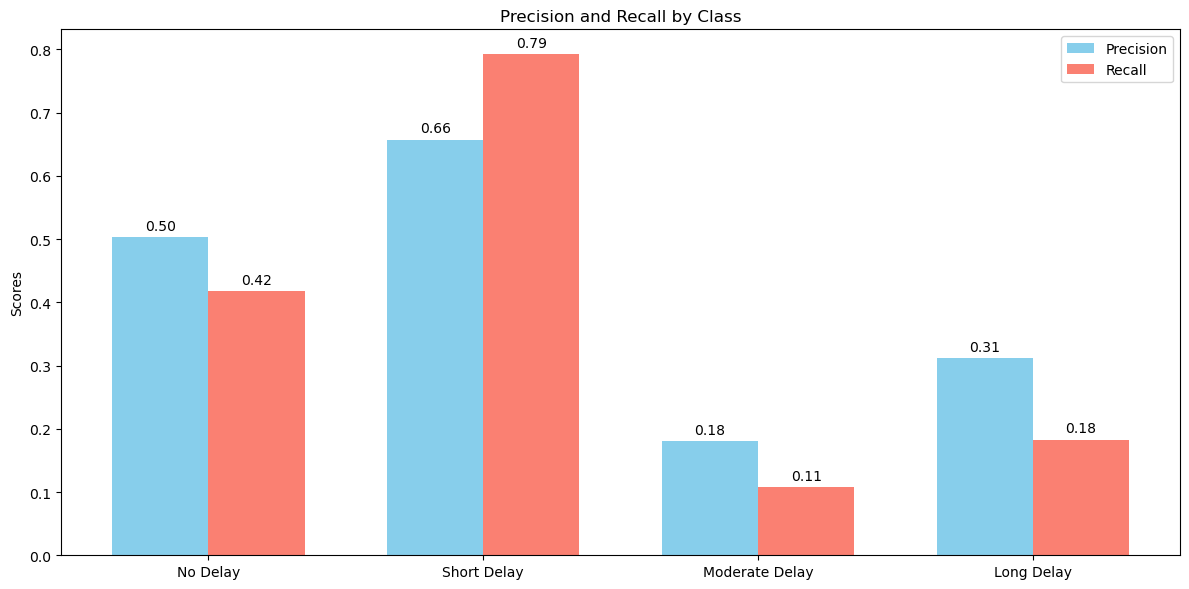

In [29]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall = precision_recall_fscore_support(y_val, y_pred, labels=['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay'])

labels = ['No Delay', 'Short Delay', 'Moderate Delay', 'Long Delay']
precision_vals = precision_recall[0]
recall_vals = precision_recall[1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, precision_vals, width, label='Precision', color='skyblue')
rects2 = ax.bar(x + width/2, recall_vals, width, label='Recall', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# Choosing the Right Model

# LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr = LogisticRegression(max_iter=20000, random_state=42)

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_val)

# Evaluate
print("Logistic Regression Performance:")
print(classification_report(y_val, y_pred_lr))


Logistic Regression Performance:


C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    Long Delay       0.39      0.01      0.02      1126
Moderate Delay       0.00      0.00      0.00       625
      No Delay       0.55      0.27      0.36      2793
   Short Delay       0.60      0.93      0.73      5831

      accuracy                           0.60     10375
     macro avg       0.39      0.30      0.28     10375
  weighted avg       0.53      0.60      0.51     10375



C:\Users\hussain\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support Vector Machine (SVM):



In [ ]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_val)

# Evaluate
print("SVM Performance:")
print(classification_report(y_val, y_pred_svm))


In [ ]:
from sklearn.svm import SVC

# Initialize the model with a linear kernel
svm = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_val)

# Evaluate
from sklearn.metrics import classification_report
print("SVM with Linear Kernel Performance:")
print(classification_report(y_val, y_pred_svm))


# GaussianNB

In [33]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_val)

# Evaluate
print("Naive Bayes Performance:")
print(classification_report(y_val, y_pred_nb))


Naive Bayes Performance:
                precision    recall  f1-score   support

    Long Delay       0.15      0.50      0.23      1126
Moderate Delay       0.09      0.74      0.16       625
      No Delay       0.50      0.21      0.29      2793
   Short Delay       0.79      0.02      0.04      5831

      accuracy                           0.17     10375
     macro avg       0.38      0.37      0.18     10375
  weighted avg       0.60      0.17      0.14     10375



# Perceptron

In [39]:
from sklearn.linear_model import Perceptron

# Initialize the model
perceptron = Perceptron(random_state=40)

# Train the model
perceptron.fit(X_train, y_train)

# Make predictions
y_pred_perceptron = perceptron.predict(X_val)

# Evaluate
print("Perceptron Performance:")
print(classification_report(y_val, y_pred_perceptron))


Perceptron Performance:
                precision    recall  f1-score   support

    Long Delay       0.00      0.00      0.00      1126
Moderate Delay       0.18      0.02      0.04       625
      No Delay       0.54      0.17      0.26      2793
   Short Delay       0.59      0.96      0.73      5831

      accuracy                           0.58     10375
     macro avg       0.33      0.29      0.26     10375
  weighted avg       0.49      0.58      0.48     10375



# 2. Regression Analysis

# Feature Selection:


In [41]:
# Define feature columns
feature_cols = ['Departure_Hour', 'Temperature (°F) Avg', 'Wind Speed (mph) Avg', 
               'Precipitation (in) Total', 'Humidity (%) Avg', 'Pressure (in) Avg']

# Include encoded categorical features
day_of_week_cols = [col for col in train_data.columns if 'Departure_DayOfWeek_' in col]
feature_cols += day_of_week_cols

# Include airline encoded features if applicable
airline_encoded_cols = [col for col in train_data.columns if 'airline.name_' in col]
feature_cols += airline_encoded_cols

# Define X and y
X = train_data[feature_cols]
y = train_data['departure.delay_minutes']


# Train-Test Split:

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# Model Training:


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Model Evaluation:



In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = rf_regressor.predict(X_val)

# Calculate metrics
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")
print(f"R² Score: {r2:.2f}")


Random Forest Regressor Performance:
Mean Absolute Error (MAE): 28.59 minutes
Root Mean Squared Error (RMSE): 72.10 minutes
R² Score: -0.22


# Cross-Validation:

In [49]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_mae = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')

print(f"Cross-Validation MAE: {-cv_mae.mean():.2f} ± {cv_mae.std():.2f} minutes")
print(f"Cross-Validation RMSE: {-cv_rmse.mean():.2f} ± {cv_rmse.std():.2f} minutes")


Cross-Validation MAE: 29.92 ± 4.35 minutes
Cross-Validation RMSE: 72.31 ± 10.88 minutes


# Feature Importance Analysis:


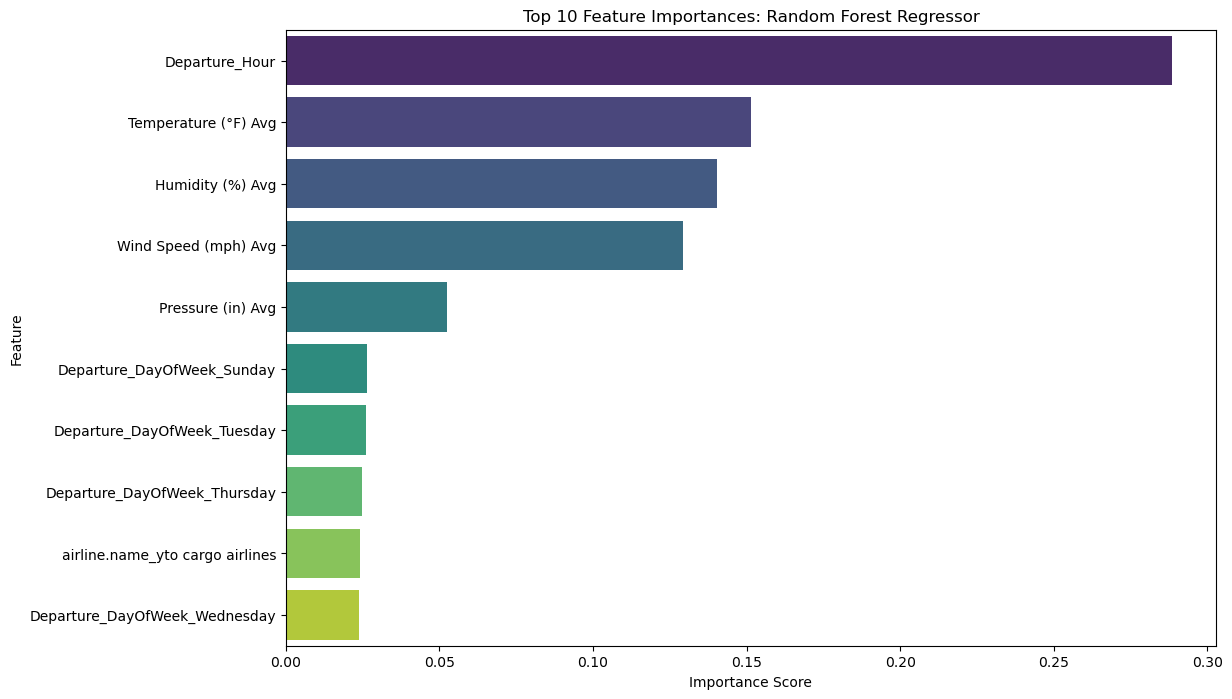

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_regressor.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances: Random Forest Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


# Phase 4: Model Optimization and Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1_macro'  # Focus on F1-Score for balanced performance
)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best estimator
best_rf_classifier = grid_search.best_estimator_


# Multi-Class Classification: Random Forest Classifier

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize Grid Search
grid_search_mc = GridSearchCV(
    estimator=rf_multiclass,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='f1_macro'
)

# Perform Grid Search
grid_search_mc.fit(X_train, y_train)

# Best parameters
print("Best Parameters (Multi-Class):", grid_search_mc.best_params_)

# Best estimator
best_rf_multiclass = grid_search_mc.best_estimator_


# Regression: Random Forest Regressor


In [ ]:
# Define the parameter grid
param_grid_reg = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize Grid Search
grid_search_reg = GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid_reg,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_absolute_error'  # Optimize for MAE
)

# Perform Grid Search
grid_search_reg.fit(X_train, y_train)

# Best parameters
print("Best Parameters (Regression):", grid_search_reg.best_params_)

# Best estimator
best_rf_regressor = grid_search_reg.best_estimator_


#  Validation with k-Fold Cross-Validation


In [ ]:
from sklearn.model_selection import cross_val_score

# For Binary Classification
cv_scores_mae = cross_val_score(best_rf_classifier, X_train, y_train, cv=5, scoring='f1_macro')
print(f"Binary Classification - Cross-Validation F1-Score: {cv_scores_mae.mean():.2f} ± {cv_scores_mae.std():.2f}")

# For Multi-Class Classification
cv_scores_mc = cross_val_score(best_rf_multiclass, X_train, y_train, cv=5, scoring='f1_macro')
print(f"Multi-Class Classification - Cross-Validation F1-Score: {cv_scores_mc.mean():.2f} ± {cv_scores_mc.std():.2f}")

# For Regression
cv_scores_reg = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Regression - Cross-Validation MAE: {-cv_scores_reg.mean():.2f} ± {cv_scores_reg.std():.2f} minutes")


# Model Comparison

# Binary Classification:

In [ ]:
from sklearn.metrics import f1_score

# Predictions with the best model
y_pred_best = best_rf_classifier.predict(X_val)

# Calculate F1-Score
f1_best = f1_score(y_val, y_pred_best, pos_label='delayed')
print(f"Best Random Forest Classifier F1-Score: {f1_best:.2f}")

# Similarly, calculate for other models if trained


# Multi-Class Classification:


In [ ]:
# Predictions with the best model
y_pred_best_mc = best_rf_multiclass.predict(X_val)

# Calculate weighted F1-Score
f1_best_mc = f1_score(y_val, y_pred_best_mc, average='weighted')
print(f"Best Multi-Class Random Forest Classifier Weighted F1-Score: {f1_best_mc:.2f}")


# Regression:



In [ ]:
# Predictions with the best model
y_pred_best_reg = best_rf_regressor.predict(X_val)

# Calculate MAE and RMSE
mae_best_reg = mean_absolute_error(y_val, y_pred_best_reg)
rmse_best_reg = np.sqrt(mean_squared_error(y_val, y_pred_best_reg))
print(f"Best Random Forest Regressor MAE: {mae_best_reg:.2f} minutes")
print(f"Best Random Forest Regressor RMSE: {rmse_best_reg:.2f} minutes")


#  TEST PART

In [ ]:
import pandas as pd

# Load the Test Dataset:

In [ ]:
# Load the cleaned test dataset without 'departure.delay_minutes'
test_data = pd.read_csv('merged_cleaned_test_flight_weather_data.csv')  # Replace with your actual path


In [ ]:
test_data

# Feature Engineering:



In [ ]:
# Extract day of the week from 'departure.scheduledTime'
test_data['departure.scheduledTime'] = pd.to_datetime(test_data['departure.scheduledTime'], errors='coerce')
test_data['Departure_DayOfWeek'] = test_data['departure.scheduledTime'].dt.day_name()

# Extract hour of the day
test_data['Departure_Hour'] = test_data['departure.scheduledTime'].dt.hour


In [ ]:
test_data

# One-Hot Encoding:



In [ ]:
# Encode 'status' column if it's categorical
#test_data['status'] = test_data['status'].astype('category').cat.codes

# One-Hot Encode 'Departure_DayOfWeek'
test_data = pd.get_dummies(test_data, columns=['Departure_DayOfWeek'], drop_first=True)

# One-Hot Encode 'airline.name' if necessary
# Ensure consistency with training data's encoded features
# Example:
# test_data = pd.get_dummies(test_data, columns=['airline.name'], drop_first=True)


In [ ]:
test_data.info(100)

# Align Feature Columns:

In [ ]:
# Define feature columns used in the model
feature_cols = ['Departure_Hour', 'Temperature (°F) Avg', 'Wind Speed (mph) Avg', 
               'Precipitation (in) Total', 'Humidity (%) Avg', 'Pressure (in) Avg']

# Include encoded categorical features
day_of_week_cols = [col for col in test_data.columns if 'Departure_DayOfWeek_' in col]
feature_cols += day_of_week_cols

# Include airline encoded features if applicable
airline_encoded_cols = [col for col in test_data.columns if 'airline.name_' in col]
feature_cols += airline_encoded_cols

# Check for missing features in test data and add them with default values
missing_features = set(feature_cols) - set(test_data.columns)
if missing_features:
    for feature in missing_features:
        test_data[feature] = 0  # Assign a default value, e.g., 0
    print(f"\nMissing features added to test data: {missing_features}")

# Select features for prediction
X_test = test_data[feature_cols]



In [ ]:
# Handle any remaining missing values
X_test = X_test.fillna(0)  # Or another appropriate method

# Ensure the order of features matches the training data
X_test = X_test[feature_cols]


In [ ]:
X_test

In [ ]:
X_test.isnull().sum()